In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss

from scipy.sparse import hstack

from typing import Tuple, Dict

In [3]:
# global variables
PATH_TO_DATA_FILE : str = 'drive/MyDrive/data/data.csv' # путь к файлу с данными

In [4]:
data = pd.read_csv(PATH_TO_DATA_FILE)
data.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1
1,2021-09-26 22:54:49.000000,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1
2,2021-09-26 23:57:20.000000,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1
3,2021-09-27 00:04:30.000000,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1
4,2021-09-27 00:06:21.000000,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1


In [5]:
# удаляю столбцы, не используемые в данном задании
data = data.drop(columns = ['oaid_hash', 'banner_id0', 'banner_id1', 'rate0', 'rate1', 'g0', 'g1', 'coeff_sum0', 'coeff_sum1'])
data.head()

,date_time,zone_id,banner_id,campaign_clicks,os_id,country_id,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,0,0,0,1,1
1,2021-09-26 22:54:49.000000,1,1,0,0,1,1,1
2,2021-09-26 23:57:20.000000,2,2,3,0,0,1,1
3,2021-09-27 00:04:30.000000,3,3,0,1,1,1,1
4,2021-09-27 00:06:21.000000,4,4,0,1,0,1,1


In [6]:
def analysis(data: pd.DataFrame):
    # проверяем, есть ли в таблице null, если да -- то в каких столбцах и в каком количестве
    null_columns=data.columns[data.isnull().any()]
    if len(null_columns) == 0:
      print("Dataframe does not consists null values")
    else:
      print("Number of null rows in columns")
      print(data[null_columns].isnull().sum())

    print("\n")

    # посмотрим на то, сколько уникальных значений в каждом столбце
    data_columns = data.columns.delete(0)
    for column_name in data_columns:
      unique_column_values = data[column_name].unique()
      print(f"count of unique values in column {column_name} = {len(unique_column_values)}")
      print("distribution of values:")
      data[column_name].hist()
      plt.show()
      print("\n")
    
    print("\n")

    # проверим разброс значений в столбце campaign_clicks
    print("in column campaign_clicks ")
    print(f"max value = {data.campaign_clicks.max()}")
    print(f"min value = {data.campaign_clicks.min()}")
    print(f"mean = {data.campaign_clicks.mean()}")
    print(f"median = {data.campaign_clicks.median()}")

    # приведу date_time столбец к нужному типу
    data['date_time'] = pd.to_datetime(data['date_time'], format = "%Y-%m-%d %H:%M:%S.%f")

    # проверим, о каком периоде у нас собраны данные
    data['date'] = data['date_time'].dt.date
    days = data['date'].unique()
    print(f"we have info about {len(days)} days. The count of rows for each day:")
    print(data['date'].value_counts())
    # в данном наборе такой проверки достаточно, т.к. рассматриваем данные взяты из небольшого диапазона
    # если бы данных было больше, то я бы проанализировала также, к каким годам и месяцам относятся данные

    print("\n")

    # тут проверяю, обо всех ли часах в днях есть данные
    data['hour'] = data['date_time'].dt.hour
    hours = data['hour'].unique()
    if len(hours) < 24:
      print(f"We have info only about {len(hours)} hours in days")

    print("\n")
    
    # узнать распределение классов
    classes_count = data['clicks'].value_counts()
    print("Count of rows into each class")
    print(classes_count)
    print(f"ratio of class 0 to class 1 {classes_count[0]/classes_count[1]}")

    del data

Dataframe does not consists null values


count of unique values in column zone_id = 3444
distribution of values:


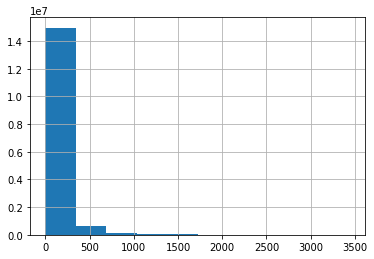



count of unique values in column banner_id = 1633
distribution of values:


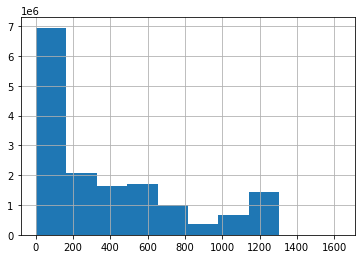



count of unique values in column campaign_clicks = 822
distribution of values:


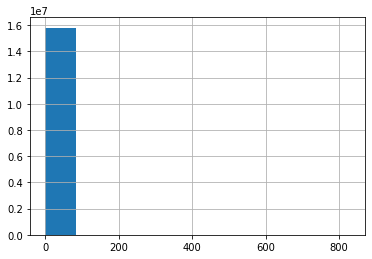



count of unique values in column os_id = 11
distribution of values:


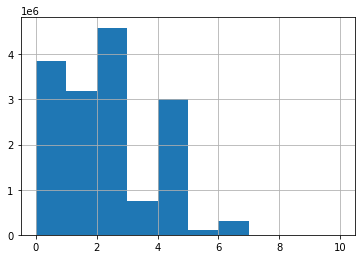



count of unique values in column country_id = 17
distribution of values:


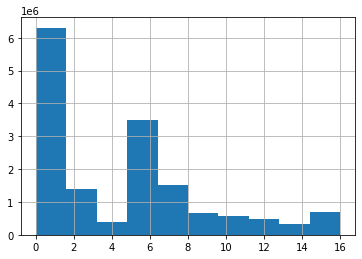



count of unique values in column impressions = 1
distribution of values:


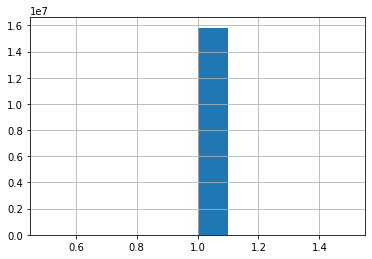



count of unique values in column clicks = 2
distribution of values:


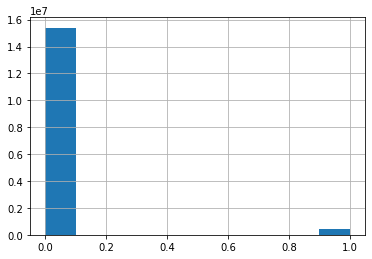





in column campaign_clicks 
max value = 829
min value = 0
mean = 0.6238539625137282
median = 0.0
we have info about 8 days. The count of rows for each day:
2021-09-26    3102610
2021-09-29    2420588
2021-09-27    2367303
2021-09-28    2307355
2021-10-02    2128978
2021-09-30    1851189
2021-10-01    1643448
2021-09-01          1
Name: date, dtype: int64




Count of rows into each class
0    15399223
1      422249
Name: clicks, dtype: int64
ratio of class 0 to class 1 36.4695310113227


In [ ]:
analysis(data)

Выводы из анализа данных:

1. В таблице нет пропущенных значений
2. Столбец impressions нужно удалить, т.к. все значения в столбце = 1. Если бы в таблице были строки с impressions = 0, то их бы в любом случае нужно было удалить: если показа не было, то и не было клика. Т.е. и без использования машинного обучения для таких строк можно было бы предсказать значение сlick с 100% уверенностью
3. У нас есть информация только о 8 днях из 2ух месяцев 2021 года. Поэтому из data_time столбца нас не интересует информация о годе.

На основе анализа и размышлений выполним следующий preprocessing:

1.  zone_id, banner_id, os_id,	country_id -- по сути, категориальные признаки(т.к. логично, что id принадлежат некоторому перечню значений). Поэтому выполним encoding для них
2. столбец impressions удаляем
3. будем использовать нормализованный столбец campaign_clicks (нормализацию выполним, т.к. нет никаких ограничений на величину в данном столбце)
4. Из информации о дате и времени оставим часы(т.к. от времени суток явно зависит просматриваемость). По сути, это тоже категориальный признак. Поэтому используем encoding для него
5. Информацию о дне/месяце использовать не нужно. Если бы у нас была большая вариативность этих признаков, их следовало бы использовать и кодировать  encoderом. Как мне кажется, сейчас эта информация не даст нам много пользы -- слишком маленький диапазон значений у величин. При этом, если мы заходим закодировать эти признаки, то таблица разрастется при кодировании(12 столбцов-месяцев, 31 столбец-день) 

Доп:
У столбцов zone_id, banner_id достаточно большое количество значений, при использовании one-hot encoding разреженные таблицы не влезают в память. Поэтому закодирую редкие значения этих признаков одним классом(-1, т.к. подобное значение точно не встречается в столбцах)

Порог отношения к одному классу выбран исходя из ограничений памяти

In [6]:
def feature_engineering(data: pd.DataFrame, columns_and_quantiles_to_group_rare_values: Dict = {'zone_id' : 0.4, 'banner_id' : 0.2}):

    data['date_time'] = pd.to_datetime(data['date_time'], format = "%Y-%m-%d %H:%M:%S.%f")
    data['date'] = data['date_time'].dt.date.astype('str')
    data['hour'] = data['date_time'].dt.hour

    data = data.drop(columns = ['date_time'])

    for column_name, quant in columns_and_quantiles_to_group_rare_values.items():
      values = data[column_name].value_counts()
      qua = values.quantile(quant)
      indexes = values[values<qua].index
      data.loc[data[column_name].isin(indexes), column_name] = -1

    # нормализуем campaign_clicks
    scaler = preprocessing.MinMaxScaler().fit(data[['campaign_clicks']])
    data[['campaign_clicks']] = scaler.fit_transform(data[['campaign_clicks']])

    # подготовим encoder для кодировки категориальных столбцов
    categorical_features = ['zone_id', 'banner_id', 'os_id', 'country_id', 'hour']
    encoder = preprocessing.OneHotEncoder(handle_unknown='ignore').fit(data[categorical_features])
    
    train_data = data[data['date'] != '2021-10-02'].drop(columns=['date'])
    test_data = data[data['date'] == '2021-10-02'].drop(columns=['date'])

    # очищаю data чтоб уместиться в памяти
    del data

    train_cat_encoded = encoder.transform(train_data[categorical_features])
    test_cat_encoded = encoder.transform(test_data[categorical_features])

    train_X = hstack([train_cat_encoded, train_data[['campaign_clicks']].values])
    train_y = train_data.clicks
    del train_data 

    test_X = hstack([test_cat_encoded, test_data[['campaign_clicks']].values])
    test_y = test_data.clicks
    del test_data

    return train_X.asformat('csr'), train_y, test_X.asformat('csr'), test_y
    

In [7]:
train_X, train_y, test_X, test_y = feature_engineering(data)

In [8]:
# понадобится для сравнения с baseline
MEAN_OF_CLICKS = data.clicks.mean()

In [9]:
del data

In [10]:
def create_model(regularization: str = 'l2', regul_const : float = 1.0):
    return LogisticRegression(penalty = regularization, solver = 'liblinear', C = regul_const, random_state=42)

In [20]:
def cv(X, y):
  c_values = [0.001, 0.05, 0.1, 0.5, 1.0]
  regul_type = ['l1', 'l2']
  scoring = ['roc_auc', 'neg_log_loss']
  best_model = None
  best_loss = 1
  for regul in regul_type:
    for c_value in c_values:
      print(f"Regularization is {regul};\t\t C = {c_value}")
      model = create_model(regul, c_value)
      cv_results = cross_validate(model, X, y, scoring=scoring, cv = 3)
      log_los_for_model = -(cv_results['test_neg_log_loss'].mean())
      auc_for_model = cv_results['test_roc_auc'].mean()
      print(f"log loss = {log_los_for_model} \n roc_auc = {auc_for_model}")
      if log_los_for_model < best_loss:
        best_model = model
        best_loss = log_los_for_model
    break
  model_params = best_model.get_params()
  print(f"best model parameters:{model_params['penalty']} regularization, C={model_params['C']}")
  return best_model
  
    

In [13]:
def calculate_metrics(y_true, y_pred):
  print(f"Roc= {roc_auc_score(y_true, y_pred[:,1])}")
  print(f"Log loss = {log_loss(y_true, y_pred)}")

In [ ]:
model = cv(train_X, train_y) 

К сожалению, colab отключает через определенный промежуток времени (локально не могу запустить, т.к. все очень плохо с памятью). Поэтому пришлось запускать код выше частями(оставляя в cv() regul_type только сначала l1, затем l2)

Данные о l1 регуляризации были потеряны из ячейки после одной из перезагрузок. Но лучше значения получила при l2-регуляризации. О ней вывод сохранился:


Regularization is l2;		 C = 0.001

log loss = 0.12092675536696885 

 roc_auc = 0.5811107367531271

Regularization is l2;		 C = 0.05

log loss = 0.12553348329312086 

 roc_auc = 0.5924282480250395

Regularization is l2;		 C = 0.1

log loss = 0.1260293742733812 

 roc_auc = 0.5933625222586086

Regularization is l2;		 C = 0.5

log loss = 0.1266941021475847 

 roc_auc = 0.5949617305973159

Regularization is l2;		 C = 1.0

log loss = 0.12683780959987673 

 roc_auc = 0.5953972529487056

In [11]:
# best model according to the results above
model = create_model('l2', 0.001)
model.fit(train_X, train_y)

LogisticRegression(C=0.001, random_state=42, solver='liblinear')

In [14]:
print("results for our model:")
test_y_pred = model.predict_proba(test_X)
calculate_metrics(test_y, test_y_pred)

results for our model:
Roc= 0.770317776919286
Log loss = 0.1356708129296589


In [15]:
print("results for baseline model:")
calculate_metrics(test_y, np.full(test_y_pred.shape, MEAN_OF_CLICKS))

results for baseline model:
Roc= 0.5
Log loss = 0.6931471805599466
